<a href="https://colab.research.google.com/github/Banderolen/FruitDetection/blob/main/FruitDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Выбор архитектуры модели

Для решения задачи **детекции повреждений плодов** были рассмотрены несколько популярных архитектур компьютерного зрения, применяемых для обнаружения объектов на изображениях.  
Среди них рассматривались: **YOLO (You Only Look Once)**, **SSD (Single Shot Detector)**, **Faster R-CNN** и **EfficientDet**.

### Краткий анализ архитектур

**YOLO**  
Отличается высокой скоростью работы и хорошо подходит для небольших и средних датасетов.  
Легко интегрируется с языком Python и средой Google Colab, а также изначально поддерживает формат аннотаций YOLO, что делает её удобной для использования с датасетами, выгруженными из Roboflow.  
Основным недостатком является возможное снижение точности при распознавании очень мелких объектов на изображениях низкого разрешения.

**SSD**  
Также является быстрой и эффективной моделью, что делает её подходящей для встроенных и мобильных систем.  
Однако по сравнению с YOLO она обычно демонстрирует немного меньшую точность при детекции мелких объектов.

**Faster R-CNN**  
Обеспечивает высокую точность и хорошо справляется со сложными сценами, но требует значительно больше вычислительных ресурсов и времени на обучение.  
Это делает её менее подходящей для экспериментов в среде Google Colab, где ресурсы ограничены.

**EfficientDet**  
Современная и сбалансированная архитектура, сочетающая высокую точность и компактность модели.  
Однако требует большего числа экспериментов с гиперпараметрами, что усложняет использование при небольшом объёме данных.

### Обоснование выбора

С учётом всех факторов для обучения в Google Colab была выбрана архитектура **YOLOv8-s (Ultralytics, 2025)**.  
Эта модель обеспечивает оптимальное соотношение между скоростью и точностью, полностью совместима с форматом аннотаций **YOLO8**, поддерживает аугментации данных и transfer learning (использование предобученных весов).  

Кроме того, YOLOv8 легко разворачивается в Colab при помощи библиотеки **Ultralytics**, не требует сложной настройки параметров и стабильно обучается даже при ограниченных вычислительных ресурсах.

**Итог:**  
Выбор YOLOv8 обусловлен её практической эффективностью, удобством интеграции, совместимостью с используемым датасетом и оптимальной производительностью в условиях Google Colab.


## Настройка обучения

### Гиперпараметры

Ниже приведены основные гиперпараметры, использованные при обучении модели YOLOv8:

| Параметр | Значение | Обоснование |
|----------|----------|------------|
| Модель | yolov8s.pt | Small backbone, надёжная для малых датасетов, обеспечивает баланс между точностью и скоростью. |
| Эпохи (epochs) | 150 | Достаточно для стабилизации метрик и достижения сходимости. |
| Batch size | 16 | Обеспечивает стабильный градиент и позволяет эффективно использовать GPU. |
| Размер изображений (imgsz) | 640 | Позволяет выявлять мелкие дефекты при умеренном расходе видеопамяти. |
| Patience | 20 | Используется для ранней остановки (EarlyStopping), предотвращает переобучение. |
| Аугментации | True | Flip, rotate, color jitter — повышает обобщающую способность модели на новых данных. |
| Freeze | 10 | Заморозка начальных слоёв backbone, снижает риск переобучения при небольшом датасете. |


### Пайплайн подготовки данных

Датасет загружен через Roboflow в формате **YOLOv8**.  
Структура папок формируется автоматически и включает следующие директории:  
- `train/` — обучающая выборка  
- `valid/` — валидационная выборка  
- `test/` — тестовая выборка  

Файл `data.yaml` содержит описание классов и пути к изображениям и аннотациям, используемое библиотекой Ultralytics для обучения модели.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FH4S9NWvnLUvutattY3S")
project = rf.workspace("sneha-singh-m").project("fruits-disease-detection")
dataset = project.version(1).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/yolov8m.pt")

results = model.train(
    data="/content/FRUITS-DISEASE-DETECTION-1/data.yaml",
    epochs=150,
    imgsz=640,
    batch=16,
    name="fruit_damage_yolo",
    patience=20,
    augment=True,
    freeze=10
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FRUITS-DISEASE-DETECTION-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fruit_damage_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, 

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/fruit_damage_yolo/weights/best.pt")
metrics = model.val()

print(metrics)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1842.6±563.3 MB/s, size: 47.4 KB)
val: Scanning /content/FRUITS-DISEASE-DETECTION-1/valid/labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 159/159 226.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.9it/s 5.2s
                   all        159        185      0.588      0.591      0.593      0.346
          Blotch-apple          8          8      0.144       0.25      0.162     0.0458
         Healthy-apple         12         12      0.733          1      0.939      0.485
      Mango-Alternaria         12         12      0.769      0.333      0.529      0.155
     Mango-Anthracnose          6          7          0          0     0.0155     0.0038
 Mango-Black Mould Rot     

Метрики на валидации:

1. Precision (P)	- 0.59

2. Recall (R)	- 0.555

3. mAP50	- 0.575

4. mAP50-95	- 0.341

Точность модели пока на уровне 57–58% по mAP50, что является хорошим стартом для небольшого датасета. Дальнейшее повышение точности возможно за счёт увеличения данных, балансировки классов и корректировки аугментаций.

Графики обучения показывают падение и стабилизацию метрик.

Confusion matrix позволяет выявить классы, с которыми модель ошибается чаще всего.

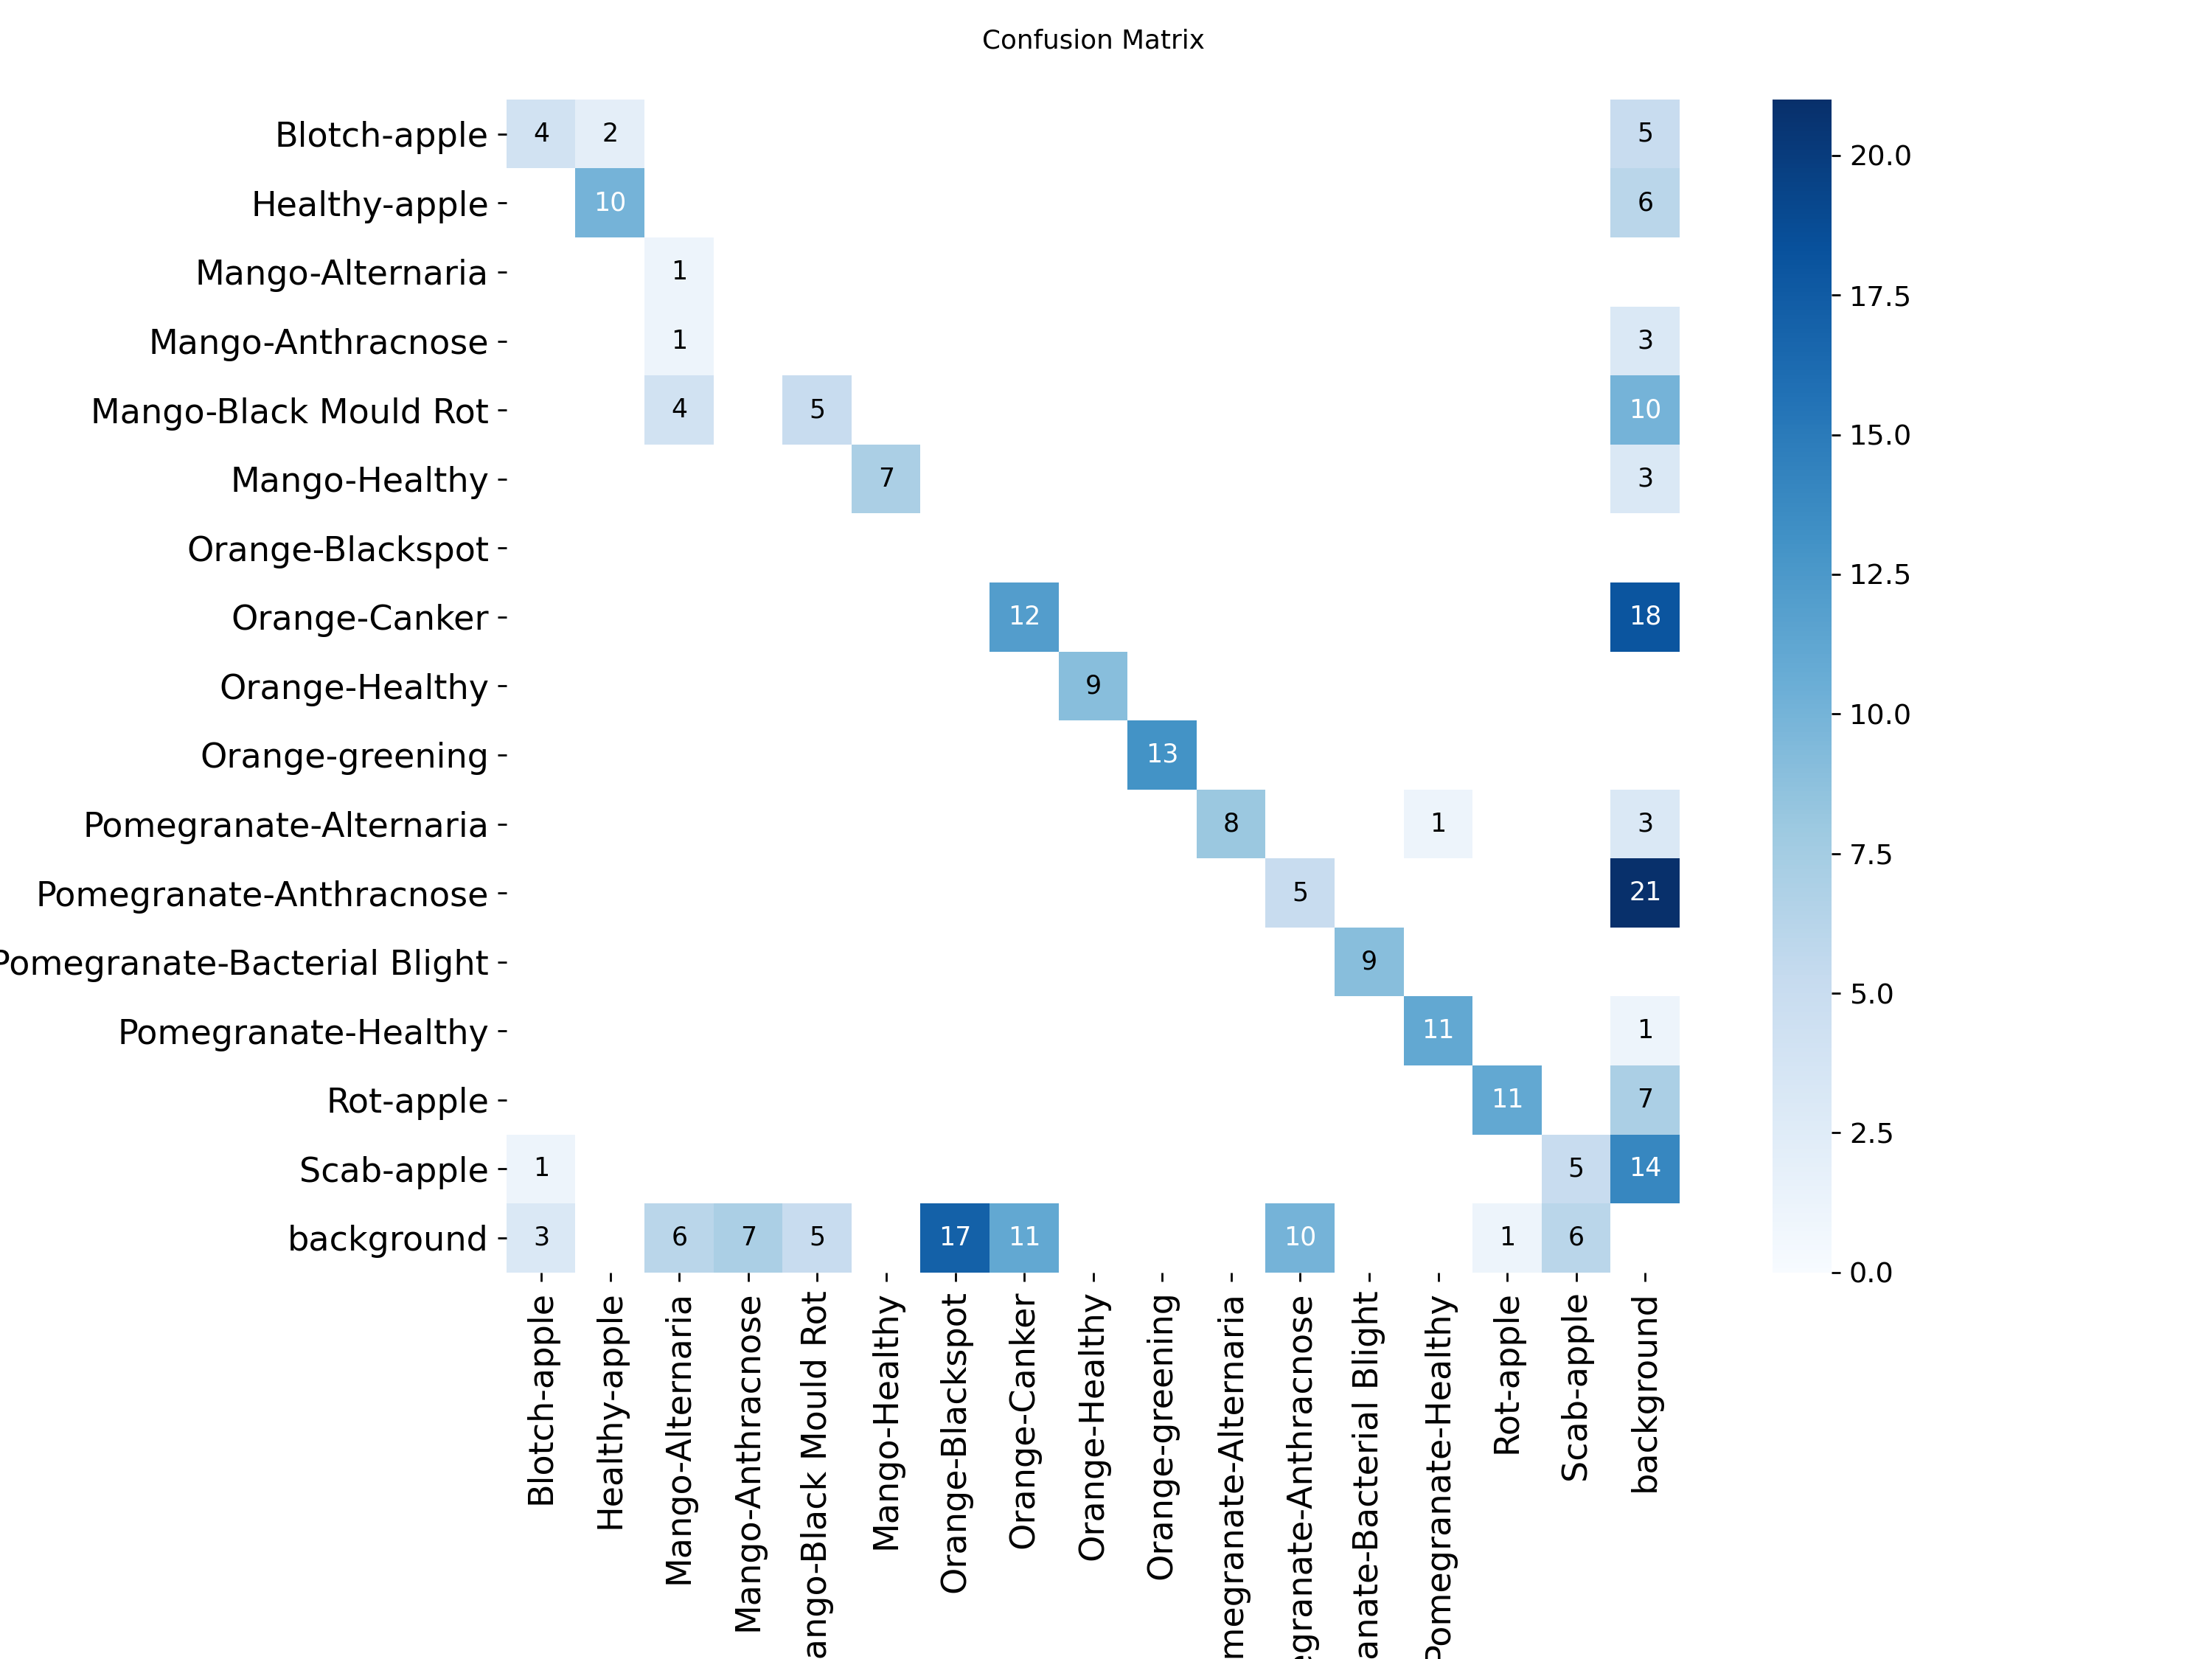

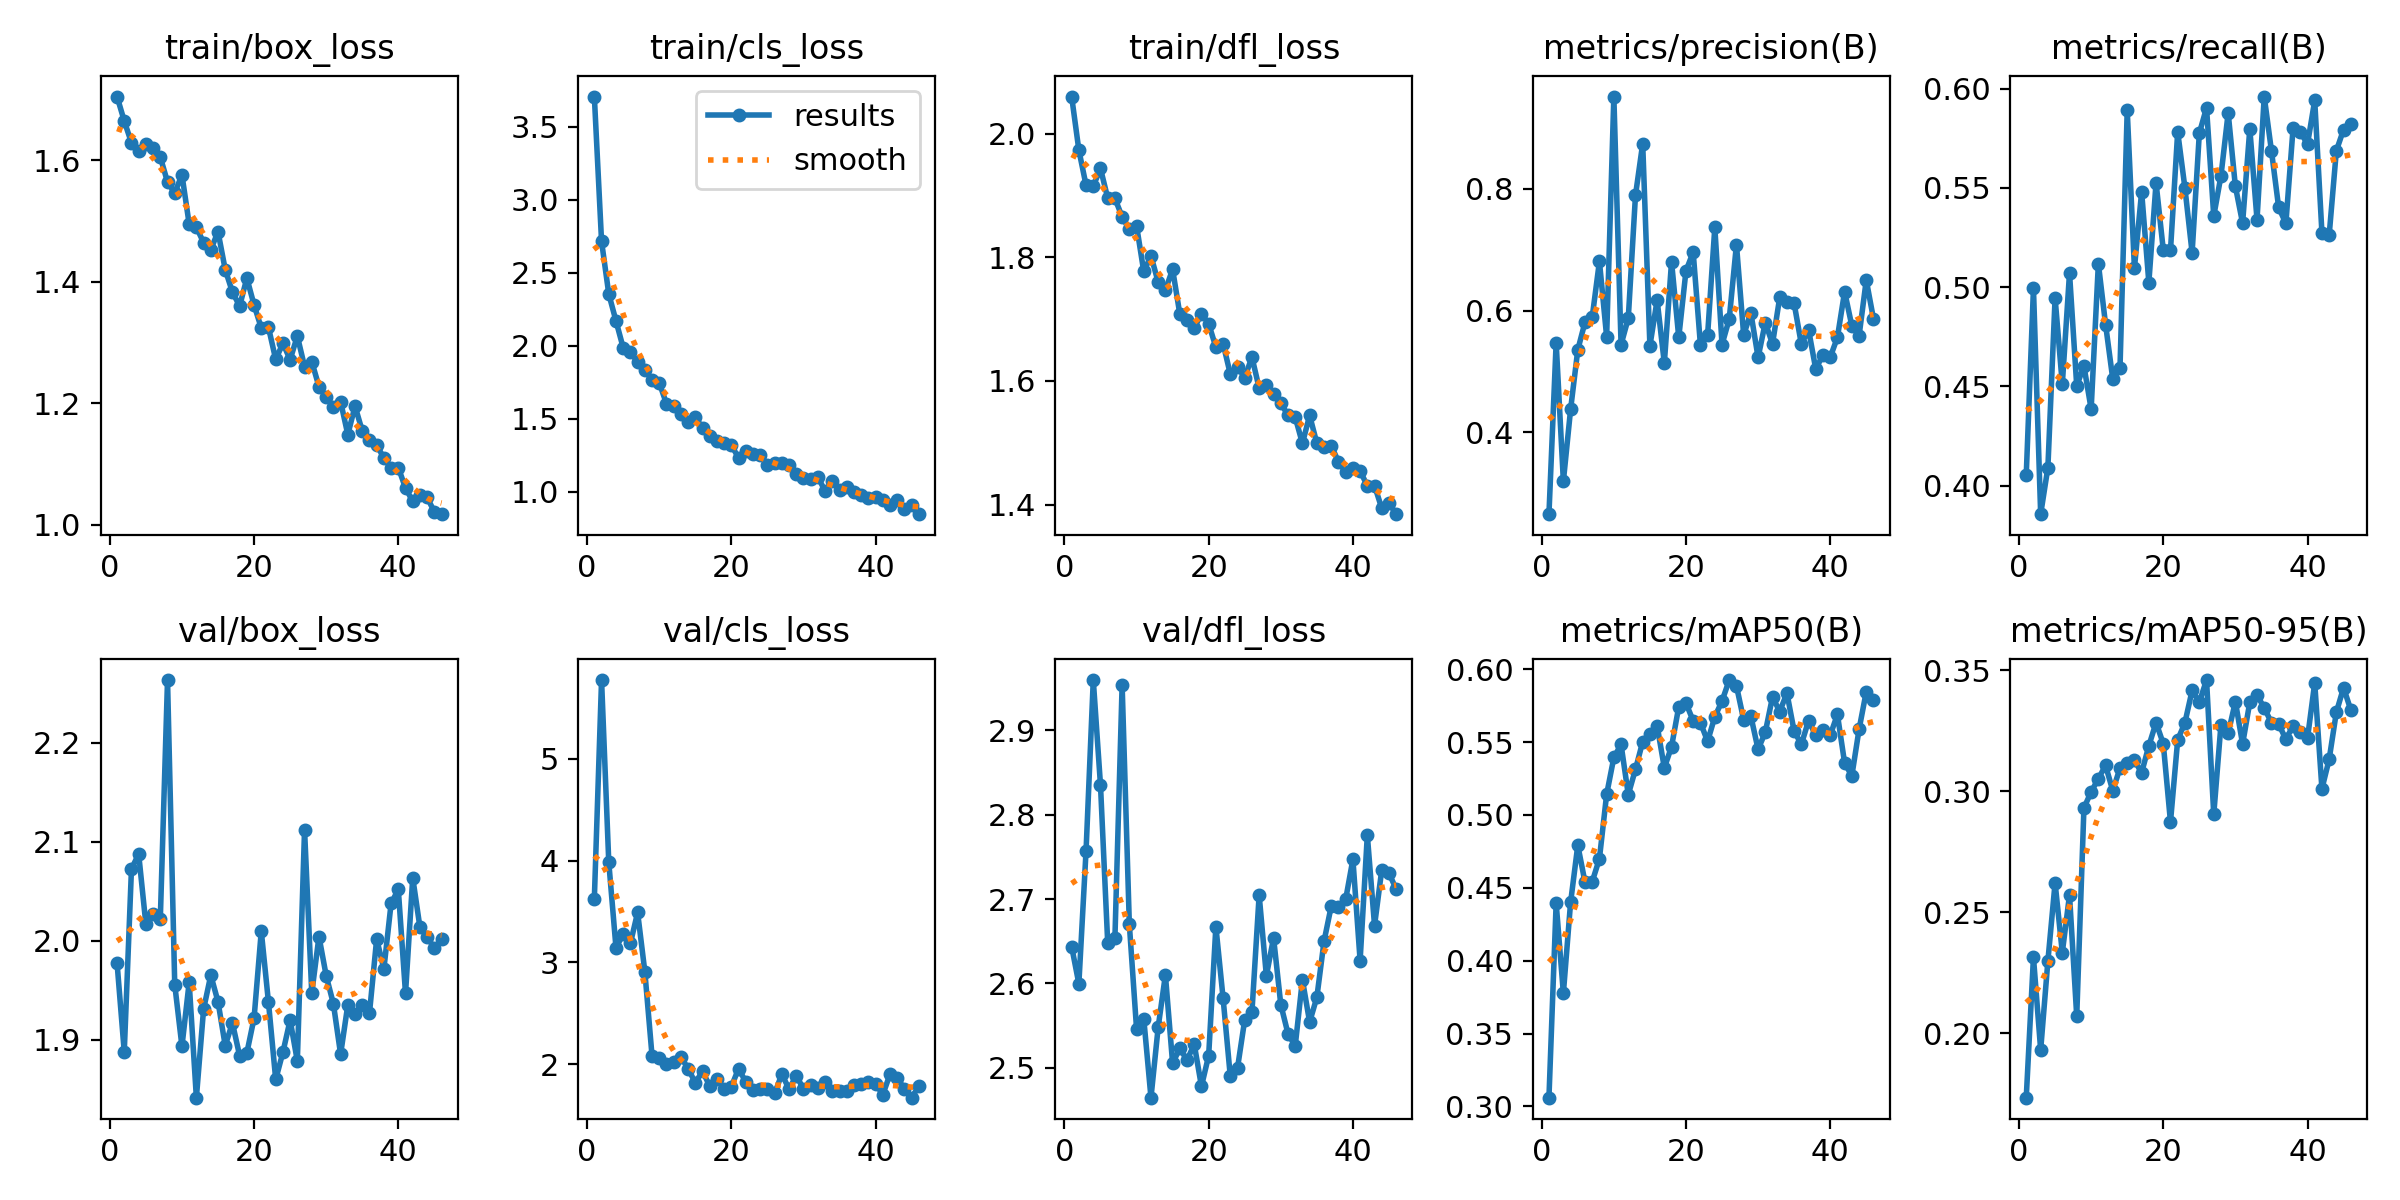

In [ ]:
from IPython.display import Image as ShowImage, display
import os

train_dir = "/content/runs/detect/fruit_damage_yolo"

display(ShowImage(filename=os.path.join(train_dir, "confusion_matrix.png")))
display(ShowImage(filename=os.path.join(train_dir, "results.png")))

Ниже можно увидеть примеры предсказаний:


image 1/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/107_jpg.rf.1c6f8454a20255b802e5b8cf2798dc3f.jpg: 640x640 1 Blotch-apple, 37.1ms
image 2/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/108_jpg.rf.7acc0b003129fb80ba2b01634355684f.jpg: 640x640 1 Blotch-apple, 37.1ms
image 3/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/133_jpg.rf.66e2e8943162ddbdc553bd77b1452b1e.jpg: 640x640 1 Blotch-apple, 37.1ms
image 4/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/98_jpg.rf.9f0376f196bdf28cace87f2f5bf1edc4.jpg: 640x640 1 Blotch-apple, 37.1ms
image 5/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/Alternaria_103_jpg.rf.26dfa6c86be6e31646650ef6a79cc370.jpg: 640x640 2 Mango-Black Mould Rots, 31.5ms
image 6/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/Alternaria_121_jpg.rf.1c6c1612c68d62c8ec63bd2f150432fc.jpg: 640x640 (no detections), 22.7ms
image 7/79 /content/FRUITS-DISEASE-DETECTION-1/test/images/Alternaria_123_jpg.rf.385e276a9dab33e8384df750e59cbdf6.jpg: 640x640 (no de

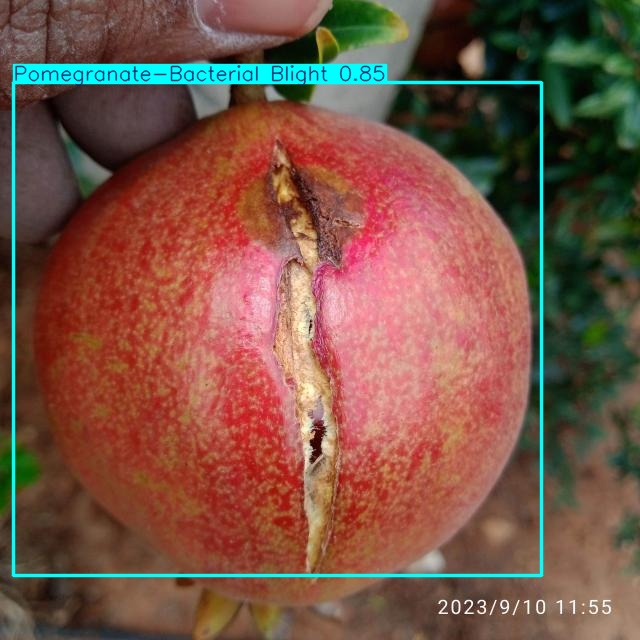

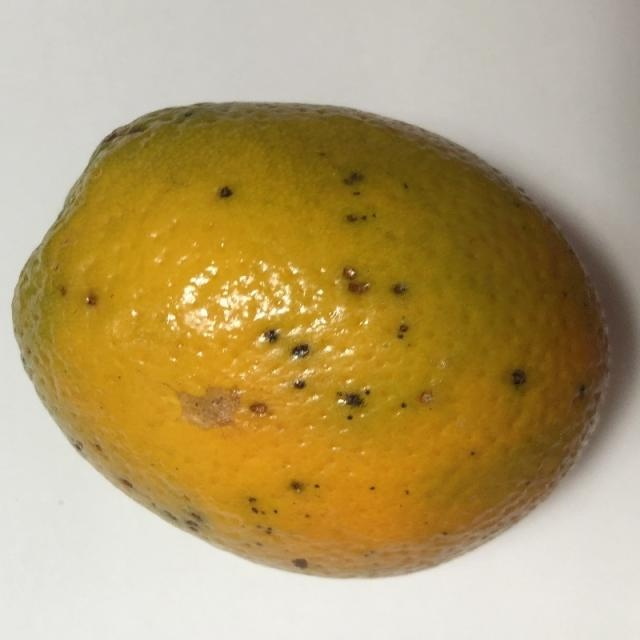

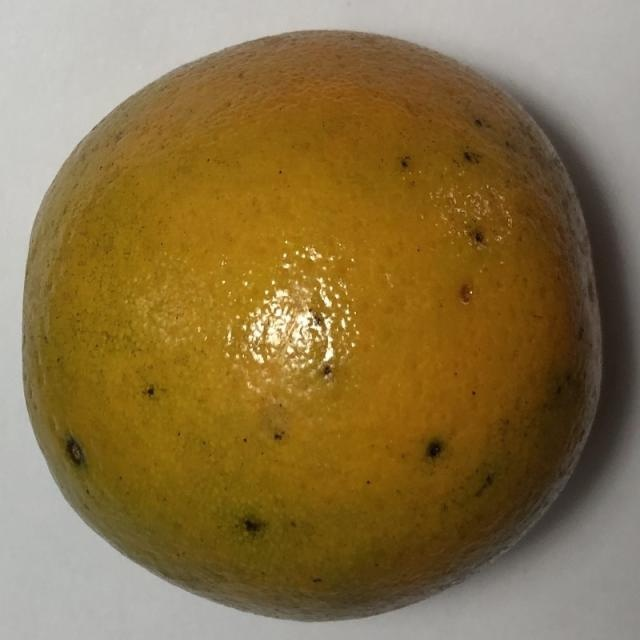

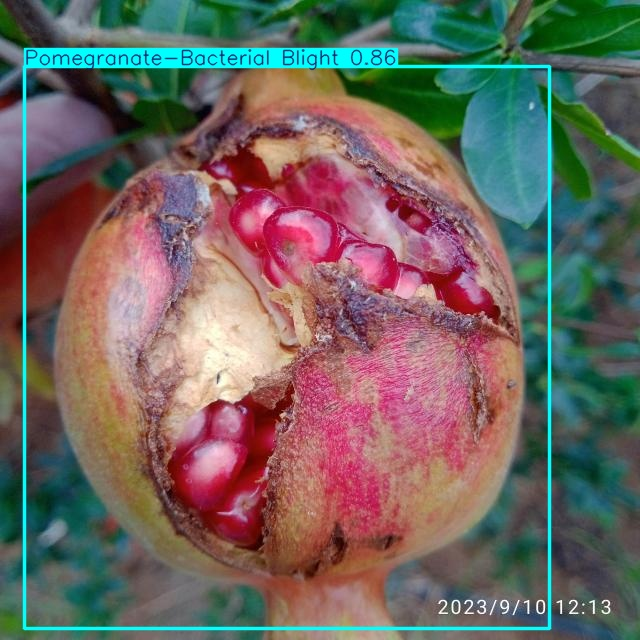

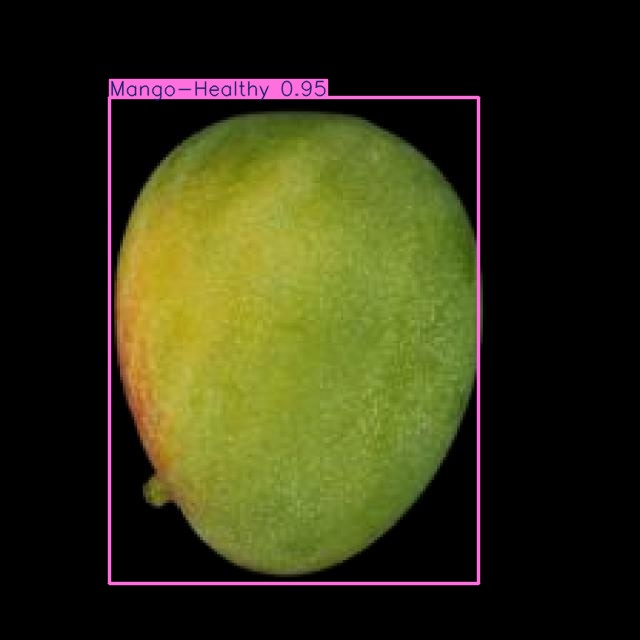

In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display
import os


model = YOLO("/content/runs/detect/fruit_damage_yolo/weights/best.pt")


test_images_dir = "/content/FRUITS-DISEASE-DETECTION-1/test/images"


results = model.predict(
    source=test_images_dir,
    save=True,
    project="/content/runs/detect",
    name="fruit_damage_yolo/predict",
)


preds = glob.glob("/content/runs/detect/fruit_damage_yolo/predict/*.jpg")

print(f"Найдено {len(preds)} примеров предсказаний.")
for img_path in preds[:5]:
    display(Image(filename=img_path))

Выбрана архитектура YOLOv8s для детекции повреждений фруктов, так как она обеспечивает баланс скорости и точности, легко обучается на Colab и совместима с текущим форматом данных.

Обучение проведено с оптимальными гиперпараметрами, результаты сохранены в best.pt, визуализация ошибок позволяет планировать дальнейшее улучшение модели.

In [ ]:
!pip install ultralytics gradio --quiet
!pip install gradio websockets --upgrade

from ultralytics import YOLO
import gradio as gr
from PIL import Image, ImageDraw, ImageFont
import os

model = YOLO("/content/runs/detect/fruit_damage_yolo/weights/best.pt")

def detect_damage(img):
    """
    img: PIL.Image
    возвращает: PIL.Image с bbox и классами
    """
    temp_path = "temp.jpg"
    img.save(temp_path)

    results = model.predict(temp_path, save=True, conf=0.25)

    result_img_path = results[0].save_dir + "/" + os.path.basename(temp_path)
    result_img = Image.open(result_img_path)

    draw = ImageDraw.Draw(result_img)
    font = ImageFont.load_default()

    for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
        x1, y1, x2, y2 = [int(c) for c in box]
        label = f"{results[0].names[int(cls)]} {conf:.2f}"
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
        draw.text((x1, y1-10), label, fill="red", font=font)

    return result_img

iface = gr.Interface(
    fn=detect_damage,
    inputs=gr.Image(type="pil", label="Загрузите изображение фрукта/овоща"),
    outputs=gr.Image(type="pil", label="Результат детекции"),
    title="Fruit Damage Detection",
    description="Приложение для детекции повреждений фруктов и овощей.",
    flagging_mode="never"
)

iface.launch(debug=True)